<a href="https://colab.research.google.com/github/last-war/HW_DataScience/blob/Homework-02/Hw2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csvframe = pd.read_csv("/content/drive/MyDrive/2017_jun_final.csv")



In [2]:
#Прочитайте отриману таблицю, використовуючи метод head
csvframe.head()


,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [3]:
#Визначте розмір таблиці за допомогою методу shape
rez = csvframe.shape
print(rez)

(8704, 25)


In [34]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
rez = csvframe.dtypes
print(rez)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [35]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
csv_check = csvframe.iloc[:,1:].isnull().sum()/(len(csvframe.index)-1)
csv_check 


Должность                           0.000000
Язык.программирования               0.442376
Специализация                       0.829484
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Университет                         0.041135
Еще.студент                         0.000000
Уровень.английского                 0.000000
Предметная.область                  0.025623
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
Валюта    

In [73]:
#Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
sub1 = csvframe.iloc[:,0:3]
sub2 = csvframe[list(csvframe.columns[3:])].dropna(axis=1)
tables_python = pd.concat([sub1, sub2], axis=1)
tables_python



,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,средний,12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700
8700,8701,Marketing,NaN,0.5,0.5,400,120,Киев,до 50 человек,Продуктовая,женский,22,Высшее,False,ниже среднего,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львов,до 10 человек,Аутстаффинговая,мужской,30,Незаконченное высшее,False,выше среднего,12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800
8702,8703,Team lead,NaN,6,4,2600,0,Днепр,свыше 1000 человек,Аутсорсинговая,мужской,34,Высшее,False,продвинутый,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600


In [74]:
#Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
csv_check = tables_python.iloc[:,1:].isnull().sum()/(len(tables_python.index)-1)
csv_check 

Должность                           0.000000
Язык.программирования               0.442376
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Еще.студент                         0.000000
Уровень.английского                 0.000000
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
dtype: float64

In [75]:
#Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
tables_python.dropna(axis=0, inplace=True)

In [76]:
#Визначте новий розмір таблиці за допомогою методу shape
rez = tables_python.shape
print(rez)

(4854, 20)


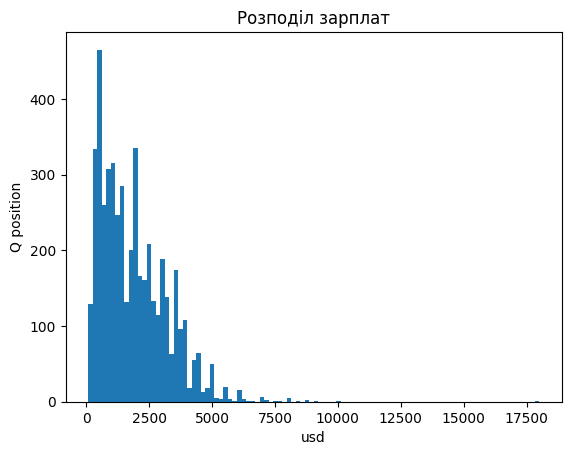

In [80]:
plt.hist(tables_python['Зарплата.в.месяц'], bins=100)
plt.title("Розподіл зарплат")
plt.xlabel("usd")
plt.ylabel("Q position")
plt.show()

[Text(0.5, 1.0, 'розподіл мов по містам з градіентом зарплати')]

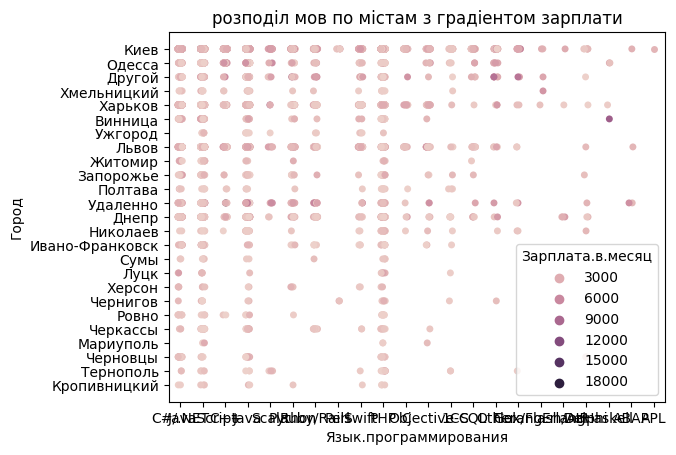

In [82]:
sns.stripplot(x='Язык.программирования', y='Город', data=tables_python, hue='Зарплата.в.месяц').set(title="розподіл мов по містам з градіентом зарплати")


In [83]:
#Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
python_data = csvframe[csvframe['Язык.программирования'] == 'Python']
python_data

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
12,13,Software Engineer,Python,NaN,1,меньше 3 месяцев,800,200,Киев,до 50 человек,...,False,ниже среднего,"Веб-разработка,Другое",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,NaN,DEV
68,69,Software Engineer,Python,NaN,1.5,0.5,900,900,Киев,до 10 человек,...,True,выше среднего,Веб-разработка,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,NaN,DEV
87,88,Junior Software Engineer,Python,NaN,0.5,0.5,600,0,Киев,до 10 человек,...,True,выше среднего,"Веб-разработка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,NaN,DEV
114,115,Junior Software Engineer,Python,NaN,1.5,0.5,685,250,Киев,до 1000 человек,...,False,средний,Другое,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,NaN,DEV
143,144,Junior Software Engineer,Python,NaN,1,1,750,250,Киев,до 10 человек,...,True,выше среднего,Веб-разработка,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,NaN,5,1,2000,800,Запорожье,до 50 человек,...,False,средний,Веб-разработка,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000,NaN,DEV
8625,8626,Software Engineer,Python,NaN,4,1,1750,0,Киев,свыше 1000 человек,...,False,средний,Веб-разработка,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750,NaN,DEV
8635,8636,Senior Software Engineer,Python,NaN,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,...,False,выше среднего,Веб-разработка,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000,NaN,DEV
8673,8674,Junior Software Engineer,Python,NaN,0.5,0.5,350,50,Киев,до 50 человек,...,False,средний,Веб-разработка,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350,NaN,DEV


In [84]:
#Визначте розмір таблиці python_data за допомогою методу shape
rez = python_data.shape
print(rez)

(207, 25)


[Text(0.5, 1.0, 'розподіл посад по містам з градіентом зарплати')]

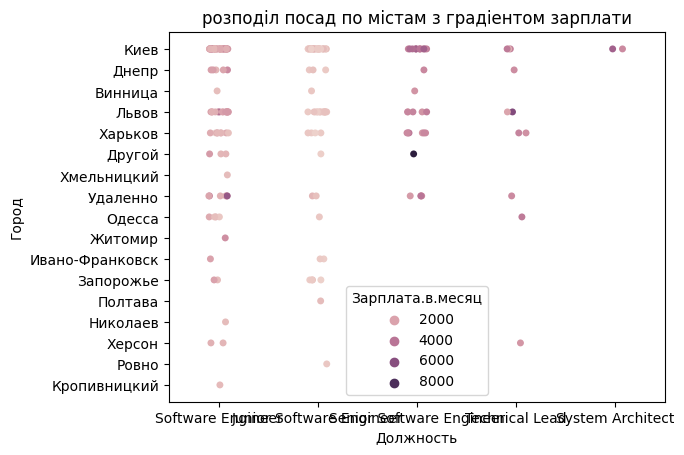

In [85]:
sns.stripplot(x='Должность', y='Город', data=python_data, hue='Зарплата.в.месяц').set(title="розподіл посад по містам з градіентом зарплати")

In [86]:
#Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
newdf = python_data.groupby('Должность')
newdf.mean()

<ipython-input-86-57643a1ef0ef>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newdf.mean()


,N,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Возраст,Еще.студент,exp,current_job_exp,salary
Должность,,,,,,,,
Junior Software Engineer,3559.063492,560.841270,181.031746,24.174603,0.380952,0.876984,0.523810,560.841270
Senior Software Engineer,4781.870968,3387.096774,431.612903,29.064516,0.032258,6.677419,1.556452,3387.096774
Software Engineer,3668.840000,1799.070000,479.830000,26.630000,0.130000,3.180000,1.127500,1799.070000
System Architect,6989.000000,4000.000000,0.000000,35.500000,0.000000,10.000000,1.125000,4000.000000
Technical Lead,5370.181818,3165.909091,455.000000,30.090909,0.000000,7.090909,3.386364,3165.909091


In [87]:
#Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg
# і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
newdf = python_data.groupby('Должность')
f_mas = newdf.agg({'Зарплата.в.месяц':['min', 'max']})
f_mas


Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200

In [88]:
#Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. 
#Використовуйте її для методу apply та створіть новий стовпчик "avg"
def fill_avg_salary(salary):
  return salary.mean()

newdf = python_data.groupby('Должность')
f_mas = newdf.agg({'Зарплата.в.месяц':['min', 'max']})
f_mas['avg'] = f_mas.apply(fill_avg_salary, axis=1)
f_mas

Зарплата.в.месяц           avg
                                      min   max        
Должность                                              
Junior Software Engineer              100  1250   675.0
Senior Software Engineer             1300  9200  5250.0
Software Engineer                     500  5400  2950.0
System Architect                     3000  5000  4000.0
Technical Lead                       1425  6200  3812.5

In [89]:
#Створіть описову статистику за допомогою методу describe для нового стовпчика.
f_mas['avg'].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64

In [90]:
#Збережіть отриману таблицю в CSV файл
f_mas.to_csv("/content/drive/MyDrive/new.csv", )